# Taller 6 - Intro a Redes Neuronales

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('auto-mpg.data',
                 names=['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin'],
                 sep=' ',
                 na_values='?',
                 comment='\t',
                 skipinitialspace=True
                 )

In [3]:
df.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [4]:
df.shape

(398, 8)

In [5]:
df.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [6]:
df.dropna(inplace=True)
df.shape

(392, 8)

In [7]:
continues_cols= [x for x in df.columns if x !='Origin']

In [8]:
continues_cols

['MPG',
 'Cylinders',
 'Displacement',
 'Horsepower',
 'Weight',
 'Acceleration',
 'Model Year']

In [9]:
df_model_base= df[continues_cols]

In [10]:
df_model_base.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year
0,18.0,8,307.0,130.0,3504.0,12.0,70
1,15.0,8,350.0,165.0,3693.0,11.5,70
2,18.0,8,318.0,150.0,3436.0,11.0,70
3,16.0,8,304.0,150.0,3433.0,12.0,70
4,17.0,8,302.0,140.0,3449.0,10.5,70


In [11]:
train = df_model_base.sample(frac=0.8, random_state=100)
train.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year
125,20.0,6,198.0,95.0,3102.0,16.5,74
142,26.0,4,79.0,67.0,1963.0,15.5,74
278,31.5,4,89.0,71.0,1990.0,14.9,78
254,20.2,6,200.0,85.0,2965.0,15.8,78
328,30.0,4,146.0,67.0,3250.0,21.8,80


In [12]:
test = df_model_base.drop(train.index)
test.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year
0,18.0,8,307.0,130.0,3504.0,12.0,70
2,18.0,8,318.0,150.0,3436.0,11.0,70
4,17.0,8,302.0,140.0,3449.0,10.5,70
8,14.0,8,455.0,225.0,4425.0,10.0,70
13,14.0,8,455.0,225.0,3086.0,10.0,70


In [13]:
print(train.shape)
print(test.shape)

(314, 7)
(78, 7)


In [14]:
train.describe()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year
count,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000
mean,23.579299,5.455414,192.562102,103.767516,2959.312102,15.518471,75.964968
std,7.877216,1.691811,103.701434,38.123560,856.880939,2.705097,3.672110
min,9.000000,3.000000,68.000000,46.000000,1649.000000,8.000000,70.000000
25%,17.125000,4.000000,98.000000,75.000000,2193.000000,13.900000,73.000000
50%,23.000000,4.000000,146.000000,94.500000,2764.500000,15.500000,76.000000
75%,29.375000,8.000000,260.000000,120.000000,3612.000000,17.000000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [15]:
train_X = train.copy()
test_X = test.copy()

In [16]:
train_y = train_X.pop('MPG')
test_y = test_X.pop('MPG')

In [17]:
train_X.dtypes

Cylinders         int64
Displacement    float64
Horsepower      float64
Weight          float64
Acceleration    float64
Model Year        int64
dtype: object

In [18]:
norm = tf.keras.layers.Normalization()

In [19]:
norm.adapt(np.array(train_X))

In [20]:
train_X[:1]

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year
125,6,198.0,95.0,3102.0,16.5,74


## Modelos con todas las variables menos categoricas
## Modelo Base

In [21]:
linear_model = tf.keras.Sequential([
    norm,
    tf.keras.layers.Dense(units=1)
])

In [22]:
linear_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization (Normalization)   │ (314, 6)               │            13 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13 (56.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 13 (56.00 B)

In [23]:
linear_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [24]:
%%time
history = linear_model.fit(
    train_X,
    train_y,
    epochs=100,
    validation_split = 0.2)

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 23.4336 - val_loss: 21.4255
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 23.3266 - val_loss: 20.8072
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 22.1981 - val_loss: 20.1117
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 21.6523 - val_loss: 19.3979
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 20.6001 - val_loss: 18.6903
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 20.0413 - val_loss: 18.0113
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 18.8575 - val_loss: 17.3287
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 17.6818 - val_loss: 16.5861
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 17.1411 - val_loss: 15.9365
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 16.3773 - val_loss: 15.1896
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 15.4440 - val_loss: 14.4864
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss:

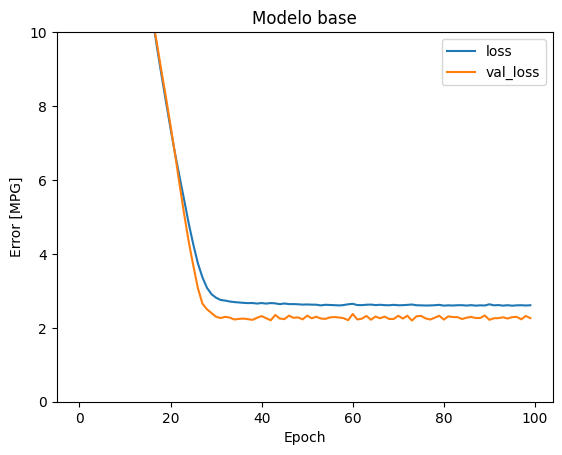

In [25]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.ylim([0, 10])
plt.xlabel('Epoch')
plt.ylabel('Error [MPG]')
plt.title("Modelo base")
plt.legend()

In [26]:
test_res = {}
test_res['modelo_base'] = linear_model.evaluate(
    test_X, test_y, verbose=0)

In [27]:
test_res

{'modelo_base': 2.7678310871124268}

In [28]:
linear_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization (Normalization)   │ (None, 6)              │            13 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │             7 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 36 (152.00 B)

 Trainable params: 7 (28.00 B)

 Non-trainable params: 13 (56.00 B)

 Optimizer params: 16 (68.00 B)

## Modelos modificando número de neuronas

### Modelo con 6 neuronas

In [29]:
linear_model_6N = tf.keras.Sequential([
    norm,
    tf.keras.layers.Dense(units=6)
])

In [30]:
linear_model_6N.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [31]:
%%time
history = linear_model_6N.fit(
    train_X,
    train_y,
    epochs=100,
    validation_split = 0.2)

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 24.2479 - val_loss: 21.9449
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 22.8558 - val_loss: 21.1972
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 21.9751 - val_loss: 20.4505
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 21.4227 - val_loss: 19.7671
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 19.8365 - val_loss: 19.0084
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 19.7291 - val_loss: 18.3384
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 18.6173 - val_loss: 17.6137
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 17.6273 - val_loss: 16.9378
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 17.4269 - val_loss: 16.2396
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 16.2475 - val_loss: 15.5514
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 15.4995 - val_loss: 14.8534
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 14

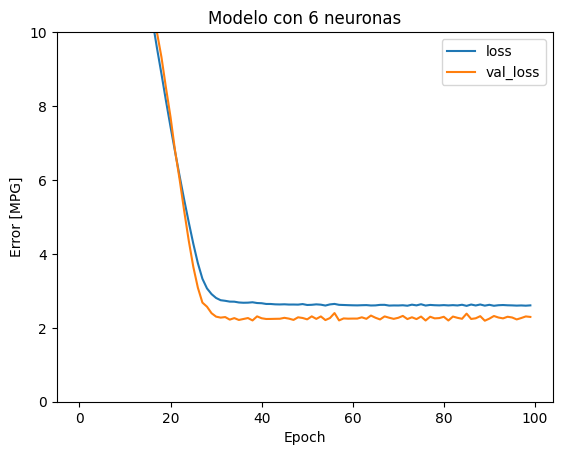

In [32]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.ylim([0, 10])
plt.xlabel('Epoch')
plt.ylabel('Error [MPG]')
plt.title("Modelo con 6 neuronas")
plt.legend()

In [33]:
test_res['modelo 6 neuronas'] = linear_model_6N.evaluate(
    test_X, test_y, verbose=0)
test_res

{'modelo_base': 2.7678310871124268, 'modelo 6 neuronas': 2.7776596546173096}

In [34]:
linear_model_6N.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization (Normalization)   │ (None, 6)              │            13 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │            42 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 141 (572.00 B)

 Trainable params: 42 (168.00 B)

 Non-trainable params: 13 (56.00 B)

 Optimizer params: 86 (348.00 B)

### Modelo con 3 neuronas

In [35]:
linear_model_3N = tf.keras.Sequential([
    norm,
    tf.keras.layers.Dense(units=3)
])

In [36]:
linear_model_3N.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [37]:
%%time
history = linear_model_3N.fit(
    train_X,
    train_y,
    epochs=100,
    validation_split = 0.2)

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 23.7977 - val_loss: 21.8651
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 22.4980 - val_loss: 21.1084
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 22.2874 - val_loss: 20.4487
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 21.4091 - val_loss: 19.7497
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 20.1913 - val_loss: 19.0354
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 19.8184 - val_loss: 18.4002
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 18.3703 - val_loss: 17.6934
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 17.7825 - val_loss: 17.0151
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 16.9570 - val_loss: 16.2924
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 16.3036 - val_loss: 15.6199
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 15.4446 - val_loss: 14.9752
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 1

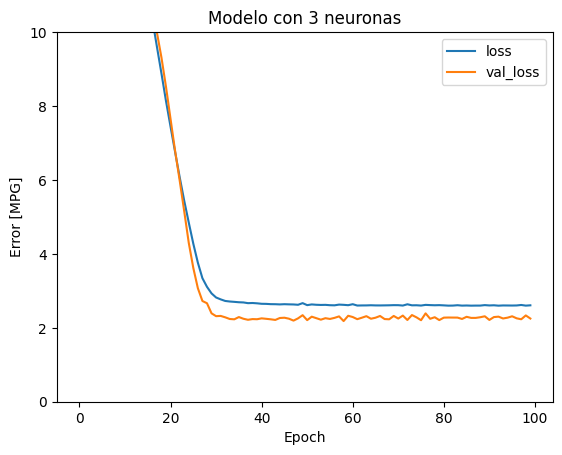

In [38]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.ylim([0, 10])
plt.xlabel('Epoch')
plt.ylabel('Error [MPG]')
plt.title("Modelo con 3 neuronas")
plt.legend()

In [39]:
test_res['modelo 3 neuronas'] = linear_model_3N.evaluate(
    test_X, test_y, verbose=0)
test_res

{'modelo_base': 2.7678310871124268,
 'modelo 6 neuronas': 2.7776596546173096,
 'modelo 3 neuronas': 2.773944854736328}

In [40]:
linear_model_3N.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization (Normalization)   │ (None, 6)              │            13 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │            21 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 78 (320.00 B)

 Trainable params: 21 (84.00 B)

 Non-trainable params: 13 (56.00 B)

 Optimizer params: 44 (180.00 B)

### Modelo 18 neuronas

In [41]:
linear_model_18N = tf.keras.Sequential([
    norm,
    tf.keras.layers.Dense(units=18)
])

In [42]:
linear_model_18N.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [43]:
%%time
history = linear_model_18N.fit(
    train_X,
    train_y,
    epochs=100,
    validation_split = 0.2)

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 23.2946 - val_loss: 21.5927
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 23.1960 - val_loss: 20.9785
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 22.1912 - val_loss: 20.3109
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 20.8885 - val_loss: 19.6320
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 20.6430 - val_loss: 18.9958
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 19.3888 - val_loss: 18.2749
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 18.7616 - val_loss: 17.6112
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 17.7983 - val_loss: 16.9396
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 17.0949 - val_loss: 16.2689
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 16.0539 - val_loss: 15.6080
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 15.1465 - val_loss: 14.9580
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 14

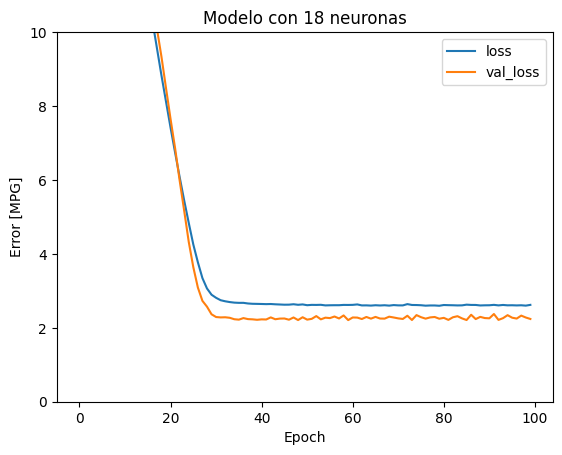

In [44]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.ylim([0, 10])
plt.xlabel('Epoch')
plt.ylabel('Error [MPG]')
plt.title("Modelo con 18 neuronas")
plt.legend()

In [45]:
test_res['modelo 18 neuronas'] = linear_model_18N.evaluate(
    test_X, test_y, verbose=0)
test_res

{'modelo_base': 2.7678310871124268,
 'modelo 6 neuronas': 2.7776596546173096,
 'modelo 3 neuronas': 2.773944854736328,
 'modelo 18 neuronas': 2.7520625591278076}

In [46]:
linear_model_18N.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization (Normalization)   │ (None, 6)              │            13 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 18)             │           126 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 393 (1.54 KB)

 Trainable params: 126 (504.00 B)

 Non-trainable params: 13 (56.00 B)

 Optimizer params: 254 (1020.00 B)

## Modificamos el número de capas

### Modelo con 3 capas

In [47]:
modelo_3_layers = tf.keras.Sequential([
      norm,
      tf.keras.layers.Dense(1),
      tf.keras.layers.Dense(1),
      tf.keras.layers.Dense(1)
  ])

In [48]:
modelo_3_layers.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [49]:
%%time
history = modelo_3_layers.fit(
    train_X,
    train_y,
    epochs=100,
    validation_split = 0.2)

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 23.6557 - val_loss: 20.5904
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 19.9828 - val_loss: 14.0160
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 10.9556 - val_loss: 5.6138
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 4.6384 - val_loss: 2.8111
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 3.6486 - val_loss: 3.7072
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 3.3524 - val_loss: 2.4782
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 3.0112 - val_loss: 2.5542
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 3.1089 - val_loss: 2.3089
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 2.9243 - val_loss: 2.3110
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 3.1292 - val_loss: 2.4214
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 2.7091 - val_loss: 2.4420
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 2.7524 - v

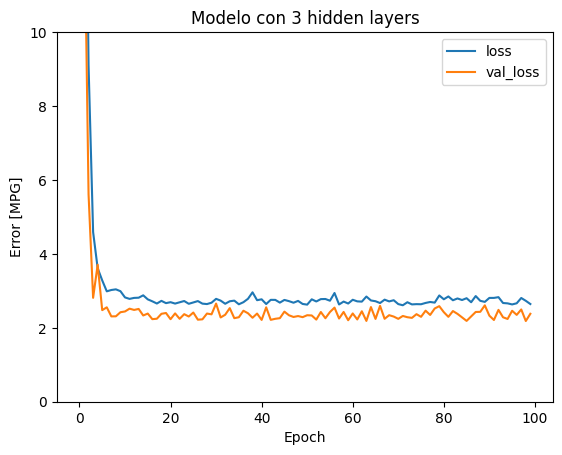

In [50]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.ylim([0, 10])
plt.xlabel('Epoch')
plt.ylabel('Error [MPG]')
plt.title("Modelo con 3 hidden layers")
plt.legend()

In [51]:
test_res['modelo 3 hidden layers'] = modelo_3_layers.evaluate(
    test_X, test_y, verbose=0)
test_res

{'modelo_base': 2.7678310871124268,
 'modelo 6 neuronas': 2.7776596546173096,
 'modelo 3 neuronas': 2.773944854736328,
 'modelo 18 neuronas': 2.7520625591278076,
 'modelo 3 hidden layers': 2.8330602645874023}

In [52]:
modelo_3_layers.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization (Normalization)   │ (None, 6)              │            13 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │             7 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │             2 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 48 (200.00 B)

 Trainable params: 11 (44.00 B)

 Non-trainable params: 13 (56.00 B)

 Optimizer params: 24 (100.00 B)

### Modelo con 6 capas

In [53]:
modelo_6_layers = tf.keras.Sequential([
      norm,
      tf.keras.layers.Dense(1),
      tf.keras.layers.Dense(1),
      tf.keras.layers.Dense(1),
      tf.keras.layers.Dense(1),
      tf.keras.layers.Dense(1),
      tf.keras.layers.Dense(1)
  ])

In [54]:
modelo_6_layers.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [55]:
%%time
history = modelo_6_layers.fit(
    train_X,
    train_y,
    epochs=100,
    validation_split = 0.2)

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - loss: 20.5754 - val_loss: 7.8769
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 6.1036 - val_loss: 5.2818
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5.0520 - val_loss: 3.0967
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.6656 - val_loss: 3.8445
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 3.9585 - val_loss: 2.5767
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 3.0231 - val_loss: 2.7737
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.0422 - val_loss: 2.4419
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2.8718 - val_loss: 2.2904
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.9512 - val_loss: 2.5155
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.7300 - val_loss: 2.6691
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 3.1592 - val_loss: 2.2965
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2.8093 - val_loss: 2.3487

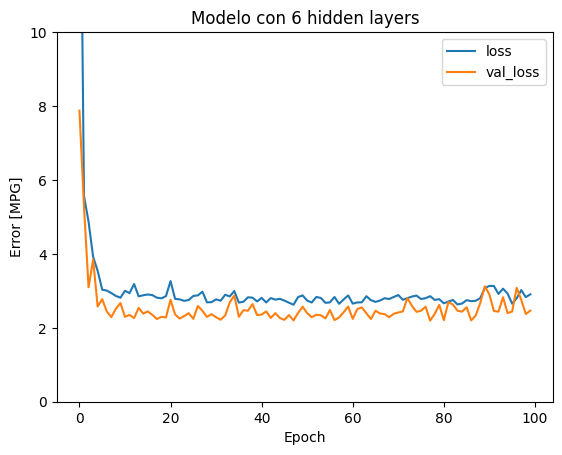

In [56]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.ylim([0, 10])
plt.xlabel('Epoch')
plt.ylabel('Error [MPG]')
plt.title("Modelo con 6 hidden layers")
plt.legend()

In [57]:
test_res['modelo 6 hidden layers'] = modelo_6_layers.evaluate(
    test_X, test_y, verbose=0)
test_res

{'modelo_base': 2.7678310871124268,
 'modelo 6 neuronas': 2.7776596546173096,
 'modelo 3 neuronas': 2.773944854736328,
 'modelo 18 neuronas': 2.7520625591278076,
 'modelo 3 hidden layers': 2.8330602645874023,
 'modelo 6 hidden layers': 2.968151807785034}

In [58]:
modelo_6_layers.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization (Normalization)   │ (None, 6)              │            13 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │             7 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │             2 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │             2 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 1)              │             2 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │             2 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 66 (272.00 B)

 Trainable params: 17 (68.00 B)

 Non-trainable params: 13 (56.00 B)

 Optimizer params: 36 (148.00 B)

## Modelo con 18 hidden layers

In [59]:
modelo_18_layers = tf.keras.Sequential([
      norm,
      tf.keras.layers.Dense(1),
      tf.keras.layers.Dense(1),
      tf.keras.layers.Dense(1),
      tf.keras.layers.Dense(1),
      tf.keras.layers.Dense(1),
      tf.keras.layers.Dense(1),
      tf.keras.layers.Dense(1),
      tf.keras.layers.Dense(1),
      tf.keras.layers.Dense(1),
      tf.keras.layers.Dense(1),
      tf.keras.layers.Dense(1),
      tf.keras.layers.Dense(1),
      tf.keras.layers.Dense(1),
      tf.keras.layers.Dense(1),
      tf.keras.layers.Dense(1),
      tf.keras.layers.Dense(1),
      tf.keras.layers.Dense(1),
      tf.keras.layers.Dense(1)
  ])

In [60]:
modelo_18_layers.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [61]:
%%time
history = modelo_18_layers.fit(
    train_X,
    train_y,
    epochs=100,
    validation_split = 0.2)

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 15s 158ms/step - loss: 21.1573 - val_loss: 5.2979
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 4.8415 - val_loss: 4.1695
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 4.1844 - val_loss: 3.3745
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 4.1084 - val_loss: 3.5850
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 4.0459 - val_loss: 2.8597
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 3.3155 - val_loss: 2.8489
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 2.9895 - val_loss: 2.3582
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 3.1517 - val_loss: 2.5354
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 2.9531 - val_loss: 3.2291
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 3.1308 - val_loss: 2.2717
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 2.7950 - val_loss: 4.9923
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 4.1517 - val

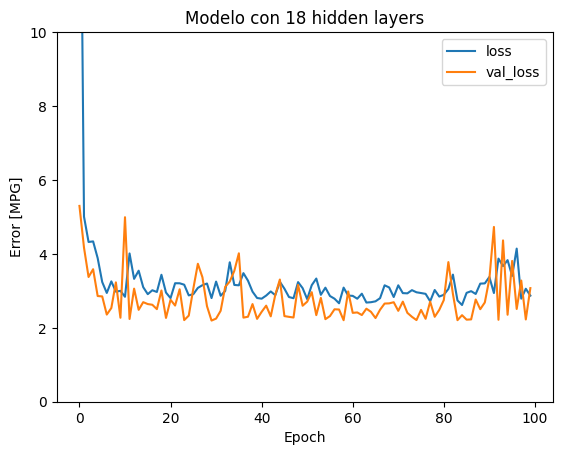

In [62]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.ylim([0, 10])
plt.xlabel('Epoch')
plt.ylabel('Error [MPG]')
plt.title("Modelo con 18 hidden layers")
plt.legend()

In [63]:
test_res['modelo 18 hidden layers'] = modelo_18_layers.evaluate(
    test_X, test_y, verbose=0)
test_res

{'modelo_base': 2.7678310871124268,
 'modelo 6 neuronas': 2.7776596546173096,
 'modelo 3 neuronas': 2.773944854736328,
 'modelo 18 neuronas': 2.7520625591278076,
 'modelo 3 hidden layers': 2.8330602645874023,
 'modelo 6 hidden layers': 2.968151807785034,
 'modelo 18 hidden layers': 3.423922061920166}

In [64]:
modelo_18_layers.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization (Normalization)   │ (None, 6)              │            13 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │             7 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │             2 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1)              │             2 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 1)              │             2 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 1)              │             2 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 1)              │             2 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 1)              │             2 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 1)              │             2 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 1)              │             2 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 1)              │             2 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 1)              │             2 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 1)              │             2 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 1)              │             2 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 1)              │             2 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 1)              │             2 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 1)              │             2 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 1)              │             2 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 138 (560.00 B)

 Trainable params: 41 (164.00 B)

 Non-trainable params: 13 (56.00 B)

 Optimizer params: 84 (340.00 B)

## Modificamos el tipo de función de activación

### Funcion de activacion SGD

In [65]:
modelo_sgd= tf.keras.Sequential([
    norm,
    tf.keras.layers.Dense(units=1)
])

In [66]:
modelo_sgd.compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.01,momentum=0.5),
    loss='mean_absolute_error')

In [67]:
%%time
history = modelo_sgd.fit(
    train_X,
    train_y,
    epochs=100,
    validation_split = 0.2)

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 24.7051 - val_loss: 21.9810
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 22.6737 - val_loss: 21.8231
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 23.7925 - val_loss: 21.6676
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 23.0590 - val_loss: 21.5130
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 22.0118 - val_loss: 21.3544
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 23.4938 - val_loss: 21.1995
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 22.9568 - val_loss: 21.0443
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 23.3069 - val_loss: 20.8879
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 22.7797 - val_loss: 20.7318
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 23.0292 - val_loss: 20.5763
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 22.0348 - val_loss: 20.4190
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 21.

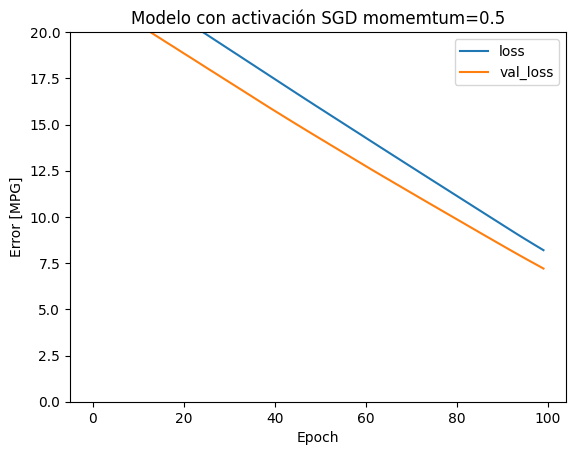

In [68]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.ylim([0, 20])
plt.xlabel('Epoch')
plt.ylabel('Error [MPG]')
plt.title("Modelo con activación SGD momemtum=0.5")
plt.legend()

In [69]:
test_res['modelo con SGD'] = modelo_sgd.evaluate(
    test_X, test_y, verbose=0)
test_res

{'modelo_base': 2.7678310871124268,
 'modelo 6 neuronas': 2.7776596546173096,
 'modelo 3 neuronas': 2.773944854736328,
 'modelo 18 neuronas': 2.7520625591278076,
 'modelo 3 hidden layers': 2.8330602645874023,
 'modelo 6 hidden layers': 2.968151807785034,
 'modelo 18 hidden layers': 3.423922061920166,
 'modelo con SGD': 7.385102272033691}

In [70]:
modelo_sgd.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization (Normalization)   │ (None, 6)              │            13 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 1)              │             7 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 29 (124.00 B)

 Trainable params: 7 (28.00 B)

 Non-trainable params: 13 (56.00 B)

 Optimizer params: 9 (40.00 B)

## Modelo con  RMSprop

In [71]:
modelo_rmsprop= tf.keras.Sequential([
    norm,
    tf.keras.layers.Dense(units=1)
])

In [72]:
modelo_rmsprop.compile(
    optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001, rho=0.01),
    loss='mean_absolute_error')

In [73]:
%%time
history = modelo_rmsprop.fit(
    train_X,
    train_y,
    epochs=100,
    validation_split = 0.2)

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 24.5788 - val_loss: 22.3677
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 23.7046 - val_loss: 22.3620
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 24.9066 - val_loss: 22.3549
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 23.9495 - val_loss: 22.3473
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 23.5793 - val_loss: 22.3400
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 23.9641 - val_loss: 22.3332
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 23.8474 - val_loss: 22.3260
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 23.9600 - val_loss: 22.3187
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 23.4185 - val_loss: 22.3117
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 23.6103 - val_loss: 22.3043
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 22.9825 - val_loss: 22.2974
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 23.7

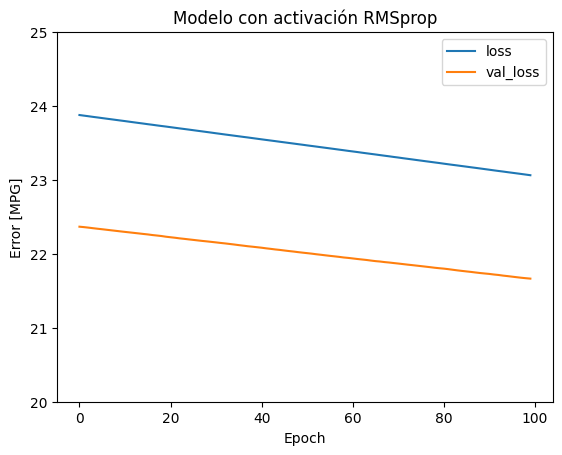

In [74]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.ylim([20, 25])
plt.xlabel('Epoch')
plt.ylabel('Error [MPG]')
plt.title("Modelo con activación RMSprop")
plt.legend()

In [75]:
test_res['modelo con RMSprop'] = modelo_rmsprop.evaluate(
    test_X, test_y, verbose=0)
test_res

{'modelo_base': 2.7678310871124268,
 'modelo 6 neuronas': 2.7776596546173096,
 'modelo 3 neuronas': 2.773944854736328,
 'modelo 18 neuronas': 2.7520625591278076,
 'modelo 3 hidden layers': 2.8330602645874023,
 'modelo 6 hidden layers': 2.968151807785034,
 'modelo 18 hidden layers': 3.423922061920166,
 'modelo con SGD': 7.385102272033691,
 'modelo con RMSprop': 22.06812858581543}

In [76]:
modelo_rmsprop.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization (Normalization)   │ (None, 6)              │            13 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 1)              │             7 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 29 (124.00 B)

 Trainable params: 7 (28.00 B)

 Non-trainable params: 13 (56.00 B)

 Optimizer params: 9 (40.00 B)

## Modelo con Nadam

In [77]:
modelo_nadam= tf.keras.Sequential([
    norm,
    tf.keras.layers.Dense(units=1)
])

In [78]:
modelo_nadam.compile(
    optimizer = tf.keras.optimizers.Nadam(learning_rate=0.00001),
    loss='mean_absolute_error')

In [79]:
%%time
history = modelo_nadam.fit(
    train_X,
    train_y,
    epochs=100,
    validation_split = 0.2)

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 23.4081 - val_loss: 22.4566
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 23.8266 - val_loss: 22.4566
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 23.3078 - val_loss: 22.4565
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 24.3672 - val_loss: 22.4564
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 23.0863 - val_loss: 22.4564
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 23.9920 - val_loss: 22.4563
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 23.8859 - val_loss: 22.4562
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 23.9224 - val_loss: 22.4562
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 23.6521 - val_loss: 22.4561
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 24.2020 - val_loss: 22.4560
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 24.3819 - val_loss: 22.4560
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 23.7

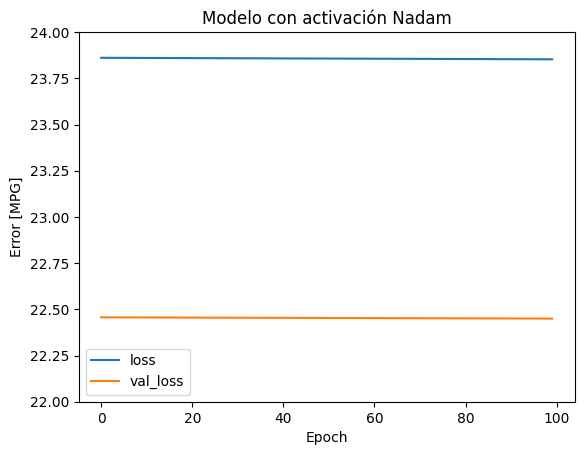

In [80]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.ylim([22, 24])
plt.xlabel('Epoch')
plt.ylabel('Error [MPG]')
plt.title("Modelo con activación Nadam")
plt.legend()

In [81]:
test_res['modelo con Nadam'] = modelo_nadam.evaluate(
    test_X, test_y, verbose=0)
test_res

{'modelo_base': 2.7678310871124268,
 'modelo 6 neuronas': 2.7776596546173096,
 'modelo 3 neuronas': 2.773944854736328,
 'modelo 18 neuronas': 2.7520625591278076,
 'modelo 3 hidden layers': 2.8330602645874023,
 'modelo 6 hidden layers': 2.968151807785034,
 'modelo 18 hidden layers': 3.423922061920166,
 'modelo con SGD': 7.385102272033691,
 'modelo con RMSprop': 22.06812858581543,
 'modelo con Nadam': 22.839012145996094}

In [82]:
modelo_nadam.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization (Normalization)   │ (None, 6)              │            13 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 1)              │             7 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 37 (156.00 B)

 Trainable params: 7 (28.00 B)

 Non-trainable params: 13 (56.00 B)

 Optimizer params: 17 (72.00 B)

## Modelos que optimizarían el MAE

### Modelo few hidden layer and couple of neurons

In [83]:
modelo_3_layers_3_neurons = tf.keras.Sequential([
      norm,
      tf.keras.layers.Dense(24, activation='relu'),
      tf.keras.layers.Dense(24, activation='relu'),
      tf.keras.layers.Dense(3)
  ])

In [84]:
modelo_3_layers_3_neurons.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [85]:
%%time
history = modelo_3_layers_3_neurons.fit(
  train_X,
  train_y,
  validation_split=0.2,
  epochs=100)

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 18.1808 - val_loss: 8.3756
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 8.3846 - val_loss: 2.6865
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.0324 - val_loss: 2.7268
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.7259 - val_loss: 2.6517
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.8467 - val_loss: 1.9506
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 2.6965 - val_loss: 1.9439
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 2.4030 - val_loss: 1.6532
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.3872 - val_loss: 1.9832
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.4078 - val_loss: 1.7649
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.2649 - val_loss: 1.9594
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.5176 - val_loss: 2.3413
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.4055 - val_loss: 2.27

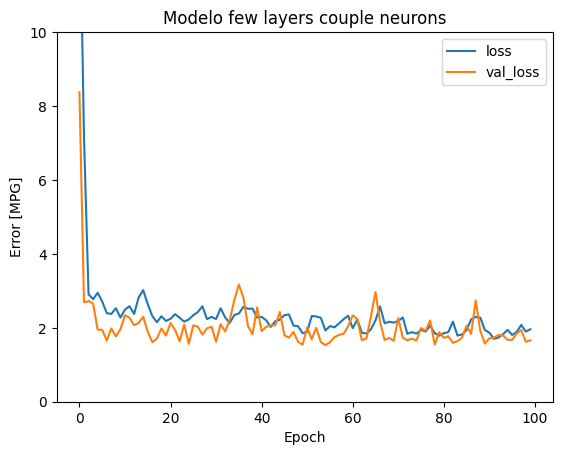

In [86]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.ylim([0, 10])
plt.xlabel('Epoch')
plt.ylabel('Error [MPG]')
plt.title("Modelo few layers couple neurons")
plt.legend()

In [87]:
test_res['modelo few hidden layers couple neurons'] = modelo_3_layers_3_neurons.evaluate(
    test_X, test_y, verbose=0)
test_res

{'modelo_base': 2.7678310871124268,
 'modelo 6 neuronas': 2.7776596546173096,
 'modelo 3 neuronas': 2.773944854736328,
 'modelo 18 neuronas': 2.7520625591278076,
 'modelo 3 hidden layers': 2.8330602645874023,
 'modelo 6 hidden layers': 2.968151807785034,
 'modelo 18 hidden layers': 3.423922061920166,
 'modelo con SGD': 7.385102272033691,
 'modelo con RMSprop': 22.06812858581543,
 'modelo con Nadam': 22.839012145996094,
 'modelo few hidden layers couple neurons': 1.89825439453125}

In [88]:
modelo_3_layers_3_neurons.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization (Normalization)   │ (None, 6)              │            13 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 24)             │           168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 24)             │           600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_36 (Dense)                │ (None, 3)              │            75 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,544 (9.95 KB)

 Trainable params: 843 (3.29 KB)

 Non-trainable params: 13 (56.00 B)

 Optimizer params: 1,688 (6.60 KB)

### Model with few layers, couple of neurons

In [89]:
modelo_3_layers_3_neurons_SGD = tf.keras.Sequential([
      norm,
      tf.keras.layers.Dense(24, activation='relu'),
      tf.keras.layers.Dense(24, activation='relu'),
      tf.keras.layers.Dense(3)
  ])

In [90]:
modelo_3_layers_3_neurons_SGD.compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.01,momentum=0.5),
    loss='mean_absolute_error')

In [91]:
%%time
history = modelo_3_layers_3_neurons_SGD.fit(
  train_X,
  train_y,
  validation_split=0.2,
  epochs=100)

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 24.1443 - val_loss: 22.0437
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 23.8893 - val_loss: 21.7799
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 23.1027 - val_loss: 21.4402
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 22.9439 - val_loss: 20.9805
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 22.5001 - val_loss: 20.3131
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 21.9011 - val_loss: 19.2846
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 20.0725 - val_loss: 17.5496
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 18.6391 - val_loss: 14.8195
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 15.6867 - val_loss: 10.9728
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 10.3917 - val_loss: 4.6526
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4.5478 - val_loss: 3.5907
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.9697 

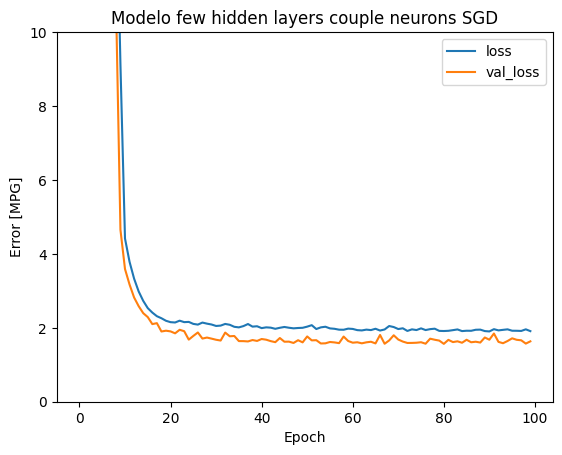

In [92]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.ylim([0, 10])
plt.xlabel('Epoch')
plt.ylabel('Error [MPG]')
plt.title("Modelo few hidden layers couple neurons SGD")
plt.legend()

In [93]:
test_res['modelo few hidden layers couple neurons SGD'] = modelo_3_layers_3_neurons_SGD.evaluate(
    test_X, test_y, verbose=0)
test_res

{'modelo_base': 2.7678310871124268,
 'modelo 6 neuronas': 2.7776596546173096,
 'modelo 3 neuronas': 2.773944854736328,
 'modelo 18 neuronas': 2.7520625591278076,
 'modelo 3 hidden layers': 2.8330602645874023,
 'modelo 6 hidden layers': 2.968151807785034,
 'modelo 18 hidden layers': 3.423922061920166,
 'modelo con SGD': 7.385102272033691,
 'modelo con RMSprop': 22.06812858581543,
 'modelo con Nadam': 22.839012145996094,
 'modelo few hidden layers couple neurons': 1.89825439453125,
 'modelo few hidden layers couple neurons SGD': 2.1854135990142822}

In [94]:
modelo_3_layers_3_neurons_SGD.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization (Normalization)   │ (None, 6)              │            13 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 24)             │           168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ (None, 24)             │           600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_39 (Dense)                │ (None, 3)              │            75 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,701 (6.65 KB)

 Trainable params: 843 (3.29 KB)

 Non-trainable params: 13 (56.00 B)

 Optimizer params: 845 (3.30 KB)